In [8]:

import types
import pandas as pd
# Product data import
product_data = pd.read_csv('/Users/felixodette/Downloads/Student-Files/Product Data Set - Student 2 of 3.csv',sep='|')
product_data.head()

,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE
0,30001,HEALTH & BEAUTY,$7.45
1,30002,HEALTH & BEAUTY,$5.35
2,30003,HEALTH & BEAUTY,$5.49
3,30004,HEALTH & BEAUTY,$6.46
4,30005,HEALTH & BEAUTY,$7.33


In [13]:
# Customer data import
customer_data = pd.read_csv('/Users/felixodette/Downloads/Student-Files/Customer Data Set - Student 1 of 3.csv',sep=',')
customer_data.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
0,10001,0,64,"$133,498",5,enrolled,06-03-2013,4,Single
1,10002,0,42,"$94,475",9,notenrolled,NaN,6,Married
2,10003,0,40,"$88,610",9,enrolled,02-09-2010,5,Married
3,10004,0,38,"$84,313",8,enrolled,06-04-2015,1,Single
4,10005,0,30,"$51,498",3,notenrolled,NaN,1,Single


In [14]:
# Transaction data import
transaction_data = pd.read_csv('Transaction Data Set - Student 3 of 3.csv',sep='|')
transaction_data.head()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT
0,10114,30011,4,0.0,1/2/2015,0
1,10217,30016,3,0.0,1/2/2015,0
2,10224,30013,4,0.0,1/2/2015,0
3,10103,30012,3,0.2,1/2/2015,0
4,10037,30010,8,0.0,1/2/2015,0


In [15]:
product_data.shape

(30, 3)

In [16]:
transaction_data.shape

(10000, 6)

In [17]:
customer_data.shape

(500, 9)

In [18]:
type(customer_data)

pandas.core.frame.DataFrame

In [20]:
customer_data.dtypes

CUSTOMERID           int64
GENDER               int64
AGE                  int64
INCOME              object
EXPERIENCE SCORE     int64
LOYALTY GROUP       object
ENROLLMENT DATE     object
HOUSEHOLD SIZE       int64
MARITAL STATUS      object
dtype: object

In [21]:
transaction_data.dtypes

CUSTOMER NUM            int64
PRODUCT NUM             int64
QUANTITY PURCHASED      int64
DISCOUNT TAKEN        float64
TRANSACTION DATE       object
STOCKOUT                int64
dtype: object

In [22]:
customer_data.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
0,10001,0,64,"$133,498",5,enrolled,06-03-2013,4,Single
1,10002,0,42,"$94,475",9,notenrolled,NaN,6,Married
2,10003,0,40,"$88,610",9,enrolled,02-09-2010,5,Married
3,10004,0,38,"$84,313",8,enrolled,06-04-2015,1,Single
4,10005,0,30,"$51,498",3,notenrolled,NaN,1,Single


In [26]:
# remove dollar sign in INCOME row
customer_data['INCOME']=customer_data['INCOME'].map(lambda x : x.replace('$',''))
customer_data.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
0,10001,0,64,"133,498",5,enrolled,06-03-2013,4,Single
1,10002,0,42,"94,475",9,notenrolled,NaN,6,Married
2,10003,0,40,"88,610",9,enrolled,02-09-2010,5,Married
3,10004,0,38,"84,313",8,enrolled,06-04-2015,1,Single
4,10005,0,30,"51,498",3,notenrolled,NaN,1,Single


In [28]:
# remove comma sign in INCOME row
customer_data['INCOME']=customer_data['INCOME'].map(lambda x : int(x.replace(',','')))
customer_data.head(2)

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
0,10001,0,64,133498,5,enrolled,06-03-2013,4,Single
1,10002,0,42,94475,9,notenrolled,NaN,6,Married


In [29]:
customer_data.dtypes

CUSTOMERID           int64
GENDER               int64
AGE                  int64
INCOME               int64
EXPERIENCE SCORE     int64
LOYALTY GROUP       object
ENROLLMENT DATE     object
HOUSEHOLD SIZE       int64
MARITAL STATUS      object
dtype: object

In [30]:
transaction_data.dtypes

CUSTOMER NUM            int64
PRODUCT NUM             int64
QUANTITY PURCHASED      int64
DISCOUNT TAKEN        float64
TRANSACTION DATE       object
STOCKOUT                int64
dtype: object

In [31]:
customer_data['MARITAL STATUS'].describe()

count         500
unique          4
top       Married
freq          267
Name: MARITAL STATUS, dtype: object

In [35]:
customer_data['INCOME'].describe()

count       500.000000
mean      85792.482000
std       37157.766304
min       20256.000000
25%       52429.000000
50%       86846.500000
75%      118381.000000
max      149999.000000
Name: INCOME, dtype: float64

In [36]:
customer_data['MARITAL STATUS'].unique()

array(['Single', 'Married', 'Divorced', 'Widow/Widower'], dtype=object)

In [38]:
# change enrollment date field to datetime
from datetime import datetime
customer_data['ENROLLMENT DATE']=\
customer_data['ENROLLMENT DATE'][customer_data['ENROLLMENT DATE'].notnull()].map(lambda x : datetime.strptime(x, '%d-%m-%Y'))

In [39]:
customer_data.dtypes

CUSTOMERID                   int64
GENDER                       int64
AGE                          int64
INCOME                       int64
EXPERIENCE SCORE             int64
LOYALTY GROUP               object
ENROLLMENT DATE     datetime64[ns]
HOUSEHOLD SIZE               int64
MARITAL STATUS              object
dtype: object

In [41]:
# data quality
print('null values for transactions? ', transaction_data.isnull().values.any())
print('null values for products? ', product_data.isnull().values.any())
print('null values for customers? ', customer_data.isnull().values.any())

null values for transactions?  False
null values for products?  False
null values for customers?  True


In [42]:
customer_data.columns[customer_data.isna().any()].tolist()

['ENROLLMENT DATE']

In [43]:
import matplotlib.pyplot as plt

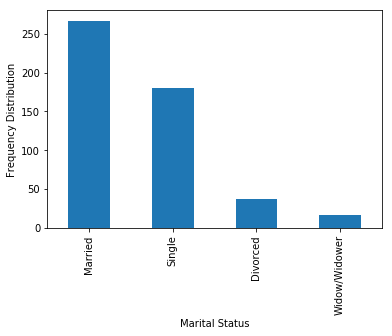

In [44]:
customer_data['MARITAL STATUS'].value_counts().plot(kind='bar')
plt.xlabel('Marital Status')
plt.ylabel('Frequency Distribution')
plt.show()

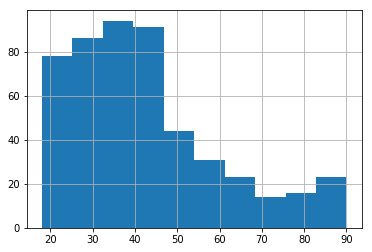

In [45]:
customer_data['AGE'].hist(bins=10)
plt.show()

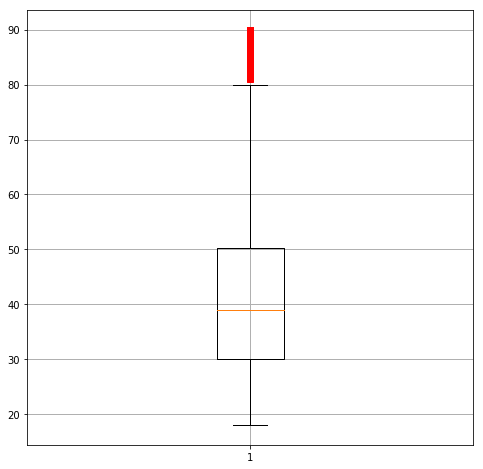

In [46]:
plt.figure(figsize=(8,8))
plt.boxplot(customer_data.AGE,0,'rs',1)
plt.grid(linestyle='-', linewidth=1)
plt.show()

In [47]:
customer_data['AGE'].describe()

count    500.000000
mean      42.316000
std       17.567509
min       18.000000
25%       30.000000
50%       39.000000
75%       50.250000
max       90.000000
Name: AGE, dtype: float64

In [49]:
# constructing new features and generating insights
trans_products=transaction_data.merge(product_data,how='inner', left_on='PRODUCT NUM', right_on='PRODUCT CODE')

In [50]:
transaction_data.head()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT
0,10114,30011,4,0.0,1/2/2015,0
1,10217,30016,3,0.0,1/2/2015,0
2,10224,30013,4,0.0,1/2/2015,0
3,10103,30012,3,0.2,1/2/2015,0
4,10037,30010,8,0.0,1/2/2015,0


In [51]:
trans_products.head()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE
0,10114,30011,4,0.0,1/2/2015,0,30011,APPAREL,$25.46
1,10086,30011,6,0.0,1/2/2015,0,30011,APPAREL,$25.46
2,10174,30011,10,0.0,1/2/2015,0,30011,APPAREL,$25.46
3,10401,30011,12,0.0,1/2/2015,0,30011,APPAREL,$25.46
4,10216,30011,12,0.1,1/2/2015,0,30011,APPAREL,$25.46


In [52]:
product_data.head()

,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE
0,30001,HEALTH & BEAUTY,$7.45
1,30002,HEALTH & BEAUTY,$5.35
2,30003,HEALTH & BEAUTY,$5.49
3,30004,HEALTH & BEAUTY,$6.46
4,30005,HEALTH & BEAUTY,$7.33


In [53]:
trans_products['UNIT LIST PRICE']=trans_products['UNIT LIST PRICE'].map(lambda x : float(x.replace('$','')))

In [54]:
trans_products.dtypes

CUSTOMER NUM            int64
PRODUCT NUM             int64
QUANTITY PURCHASED      int64
DISCOUNT TAKEN        float64
TRANSACTION DATE       object
STOCKOUT                int64
PRODUCT CODE            int64
PRODUCT CATEGORY       object
UNIT LIST PRICE       float64
dtype: object

In [55]:
trans_products['TOTAL PRICE']=trans_products['QUANTITY PURCHASED']*trans_products['UNIT LIST PRICE']*(1-trans_products['DISCOUNT TAKEN'])

In [56]:
trans_products.head()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE,TOTAL PRICE
0,10114,30011,4,0.0,1/2/2015,0,30011,APPAREL,25.46,101.840
1,10086,30011,6,0.0,1/2/2015,0,30011,APPAREL,25.46,152.760
2,10174,30011,10,0.0,1/2/2015,0,30011,APPAREL,25.46,254.600
3,10401,30011,12,0.0,1/2/2015,0,30011,APPAREL,25.46,305.520
4,10216,30011,12,0.1,1/2/2015,0,30011,APPAREL,25.46,274.968


In [57]:
income_by_product=trans_products.groupby('PRODUCT CATEGORY').agg({'TOTAL PRICE':'sum'}).sort_values('TOTAL PRICE',ascending=False)

In [58]:
income_by_product

,TOTAL PRICE
PRODUCT CATEGORY,
ELECTRONICS,1607192.422
APPAREL,936757.914
FOOD,96044.610
HEALTH & BEAUTY,54776.312


In [59]:
revenue_by_product=income_by_product.rename(columns={'TOTAL PRICE':'REVENUE PER PRODUCT'})

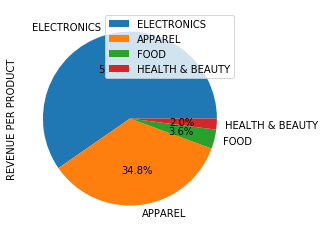

In [63]:
revenue_by_product['REVENUE PER PRODUCT'].plot(kind='pie',autopct='%1.1f%%',legend=True)

In [66]:
# calculate for each customer, total spend, total spend per category, recent transaction date
customer_prod_category=trans_products.groupby(['CUSTOMER NUM','PRODUCT CATEGORY']).agg({'TOTAL PRICE':'sum'})

In [67]:
customer_prod_category

TOTAL PRICE
CUSTOMER NUM PRODUCT CATEGORY             
10001        APPAREL              4022.430
             ELECTRONICS          1601.315
             FOOD                   68.688
             HEALTH & BEAUTY      1134.337
10002        APPAREL              2312.509
             ELECTRONICS          2473.163
             FOOD                  276.779
10003        APPAREL              2887.382
             ELECTRONICS          5414.418
             FOOD                  260.640
10004        APPAREL              3637.213
             ELECTRONICS          1840.211
             FOOD                   45.270
10005        APPAREL               213.512
10006        APPAREL              1448.330
             ELECTRONICS          2785.763
             FOOD                  720.379
             HEALTH & BEAUTY       280.375
10007        APPAREL              1252.726
             ELECTRONICS          3918.466
             FOOD                   53.424
10008        APPAREL              3755.118
             ELECTRONICS          4547.491
             FOOD                  109.392
10009        APPAREL              2696.621
             ELECTRONICS          6186.060
             FOOD                  233.895
10010        APPAREL              2385.751
             ELECTRONICS          4149.670
             FOOD                   84.726
...                                    ...
10491        APPAREL              3638.338
             ELECTRONICS          2170.168
             FOOD                  130.436
             HEALTH & BEAUTY       236.054
10492        APPAREL              2188.407
             ELECTRONICS          2958.606
10493        APPAREL              3342.895
             ELECTRONICS         10795.411
             FOOD                  715.380
             HEALTH & BEAUTY       163.554
10494        APPAREL              1301.420
             ELECTRONICS          3724.486
             FOOD                  253.820
10495        APPAREL               205.170
10496        APPAREL              4611.468
             ELECTRONICS          3616.106
             FOOD                  186.110
             HEALTH & BEAUTY        87.780
10497        APPAREL              3404.527
             ELECTRONICS          5905.274
             FOOD                  420.912
             HEALTH & BEAUTY       172.945
10498        APPAREL              1723.623
             ELECTRONICS          3424.110
             FOOD                  783.588
             HEALTH & BEAUTY       320.145
10499        HEALTH & BEAUTY        20.010
10500        APPAREL              1511.748
             ELECTRONICS          2632.269
             FOOD                   38.015

[1427 rows x 1 columns]

In [69]:
customer_prod_category.columns

Index(['TOTAL PRICE'], dtype='object')

In [70]:
customer_prod_category.reset_index().head()

,CUSTOMER NUM,PRODUCT CATEGORY,TOTAL PRICE
0,10001,APPAREL,4022.430
1,10001,ELECTRONICS,1601.315
2,10001,FOOD,68.688
3,10001,HEALTH & BEAUTY,1134.337
4,10002,APPAREL,2312.509


In [71]:
customer_prod_category=customer_prod_category.reset_index()

In [72]:
customer_pivot=customer_prod_category.pivot(index='CUSTOMER NUM',columns='PRODUCT CATEGORY',values='TOTAL PRICE')

In [73]:
customer_pivot.head()

PRODUCT CATEGORY,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY
CUSTOMER NUM,,,,
10001,4022.430,1601.315,68.688,1134.337
10002,2312.509,2473.163,276.779,NaN
10003,2887.382,5414.418,260.640,NaN
10004,3637.213,1840.211,45.270,NaN
10005,213.512,NaN,NaN,NaN


In [74]:
trans_products['TRANSACTION DATE']=trans_products['TRANSACTION DATE'].map(lambda x : datetime.strptime(x, '%m/%d/%Y'))

In [76]:
recent_trans_total_spend=trans_products.groupby('CUSTOMER NUM').\
agg({'TRANSACTION DATE':'max','TOTAL PRICE':'sum'}).\
rename(columns={'TRANSACTIN DATE':'RECENT TRANSACTION DATE','TOTAL PRICE':'TOTAL SPENT'})
recent_trans_total_spend.head()

,TRANSACTION DATE,TOTAL SPENT
CUSTOMER NUM,,
10001,2015-12-24,6826.770
10002,2015-12-21,5062.451
10003,2015-12-31,8562.440
10004,2015-12-17,5522.694
10005,2015-12-22,213.512


In [77]:
customer_KPIs=customer_pivot.merge(recent_trans_total_spend,how='inner',left_index=True,right_index=True)

In [78]:
customer_KPIs.head()

,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,TRANSACTION DATE,TOTAL SPENT
CUSTOMER NUM,,,,,,
10001,4022.430,1601.315,68.688,1134.337,2015-12-24,6826.770
10002,2312.509,2473.163,276.779,NaN,2015-12-21,5062.451
10003,2887.382,5414.418,260.640,NaN,2015-12-31,8562.440
10004,3637.213,1840.211,45.270,NaN,2015-12-17,5522.694
10005,213.512,NaN,NaN,NaN,2015-12-22,213.512


In [79]:
customer_KPIs=customer_KPIs.fillna(0)
customer_KPIs.head()

,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,TRANSACTION DATE,TOTAL SPENT
CUSTOMER NUM,,,,,,
10001,4022.430,1601.315,68.688,1134.337,2015-12-24,6826.770
10002,2312.509,2473.163,276.779,0.000,2015-12-21,5062.451
10003,2887.382,5414.418,260.640,0.000,2015-12-31,8562.440
10004,3637.213,1840.211,45.270,0.000,2015-12-17,5522.694
10005,213.512,0.000,0.000,0.000,2015-12-22,213.512


In [80]:
customer_all_view=customer_data.merge(customer_KPIs,how='inner',left_on='CUSTOMERID',right_index=True)

In [81]:
customer_all_view.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,TRANSACTION DATE,TOTAL SPENT
0,10001,0,64,133498,5,enrolled,2013-03-06,4,Single,4022.430,1601.315,68.688,1134.337,2015-12-24,6826.770
1,10002,0,42,94475,9,notenrolled,NaT,6,Married,2312.509,2473.163,276.779,0.000,2015-12-21,5062.451
2,10003,0,40,88610,9,enrolled,2010-09-02,5,Married,2887.382,5414.418,260.640,0.000,2015-12-31,8562.440
3,10004,0,38,84313,8,enrolled,2015-04-06,1,Single,3637.213,1840.211,45.270,0.000,2015-12-17,5522.694
4,10005,0,30,51498,3,notenrolled,NaT,1,Single,213.512,0.000,0.000,0.000,2015-12-22,213.512


In [82]:
# bivariate analysis - loyalty as a target
table=pd.crosstab(customer_all_view['GENDER'],customer_all_view['LOYALTY GROUP'])
table

LOYALTY GROUP,enrolled,notenrolled
GENDER,,
0,131,120
1,133,116


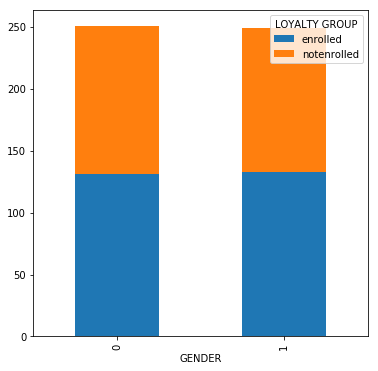

In [83]:
table.plot(kind='bar',stacked=True,figsize=(6,6))

In [84]:
# Experience score
table=pd.crosstab(customer_all_view['EXPERIENCE SCORE'],customer_all_view['LOYALTY GROUP'])

In [86]:
table

LOYALTY GROUP,enrolled,notenrolled
EXPERIENCE SCORE,,
1,0,28
2,0,19
3,0,18
4,0,22
5,43,23
6,48,32
7,49,22
8,42,21
9,44,28


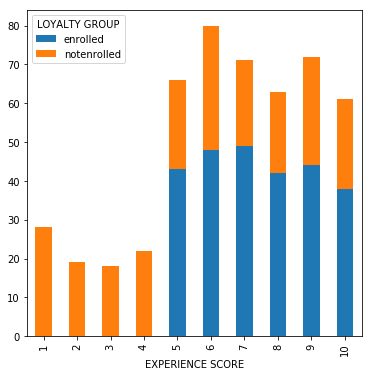

In [87]:
table.plot(kind='bar', stacked=True, figsize=(6,6))
plt.show()

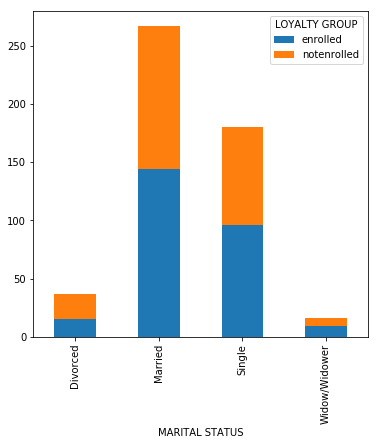

In [89]:
#Marital status
table=pd.crosstab(customer_all_view['MARITAL STATUS'],customer_all_view['LOYALTY GROUP'])
table.plot(kind='bar',stacked=True,figsize=(6,6))
plt.show()

In [90]:
# Age
customer_all_view['AGE BINNED']=pd.cut(customer_all_view['AGE'],10)

In [92]:
customer_all_view['AGE BINNED'].value_counts()

(32.4, 39.6]      94
(39.6, 46.8]      91
(25.2, 32.4]      86
(17.928, 25.2]    78
(46.8, 54.0]      51
(54.0, 61.2]      24
(82.8, 90.0]      23
(61.2, 68.4]      23
(75.6, 82.8]      16
(68.4, 75.6]      14
Name: AGE BINNED, dtype: int64

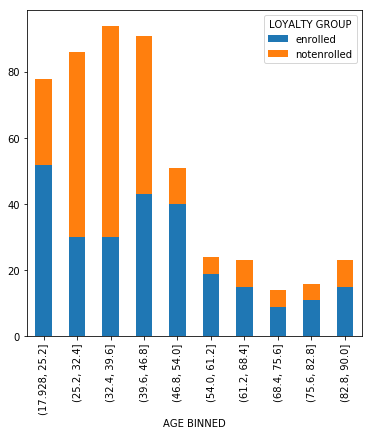

In [93]:
table=pd.crosstab(customer_all_view['AGE BINNED'],customer_all_view['LOYALTY GROUP'])
table.plot(kind='bar',stacked=True,figsize=(6,6))
plt.show()

In [94]:
customer_all_view.groupby('LOYALTY GROUP').agg({'AGE':'mean'})

,AGE
LOYALTY GROUP,
enrolled,44.723485
notenrolled,39.622881


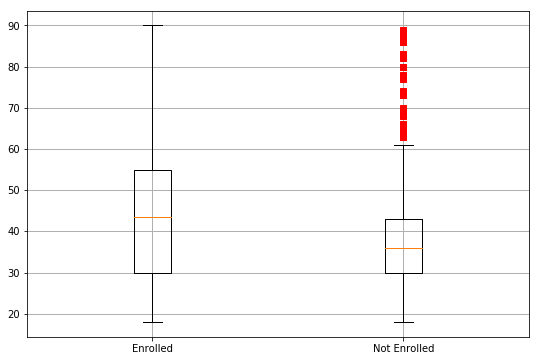

In [95]:
fig = plt.figure(1, figsize=(9,6))
ax=fig.add_subplot(111)
plot1=customer_all_view['AGE'][customer_all_view['LOYALTY GROUP']=='enrolled']
plot2=customer_all_view['AGE'][customer_all_view['LOYALTY GROUP']=='notenrolled']
list1=[plot1,plot2]
ax.boxplot(list1,0,'rs',1)
ax.set_xticklabels(['Enrolled', 'Not Enrolled'])
plt.grid(linestyle='-', linewidth=1)
plt.show()

In [96]:
customer_all_view['TOTAL SPENT BINNED']=pd.cut(customer_all_view['TOTAL SPENT'],10)

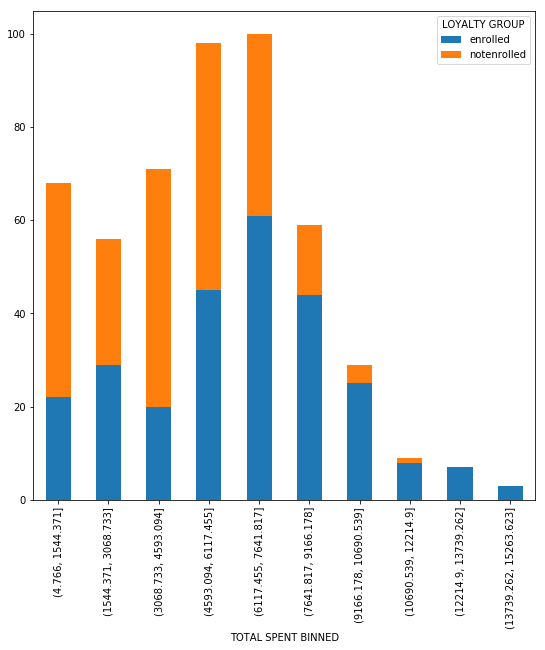

In [97]:
table=pd.crosstab(customer_all_view['TOTAL SPENT BINNED'],customer_all_view['LOYALTY GROUP'])
table.plot(kind='bar', stacked=True, figsize = (9,9))
plt.show()

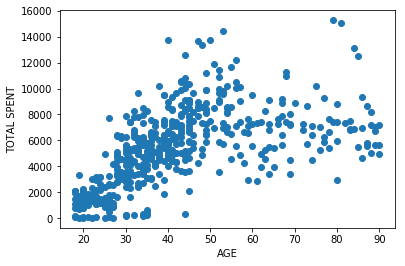

In [98]:
plt.scatter(customer_all_view['AGE'],customer_all_view['TOTAL SPENT'])
plt.xlabel('AGE')
plt.ylabel('TOTAL SPENT')
plt.show()

In [99]:
from scipy.stats import pearsonr
pearsonr(customer_all_view['AGE'],customer_all_view['TOTAL SPENT'])

(0.5760170677259271, 1.5608217502782303e-45)

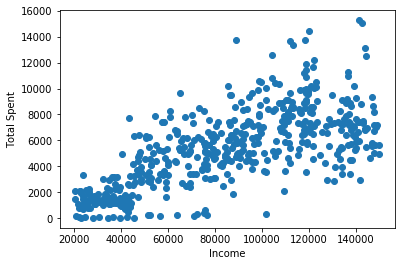

In [100]:
plt.scatter(customer_all_view['INCOME'],customer_all_view['TOTAL SPENT'])
plt.xlabel('Income')
plt.ylabel('Total Spent')
plt.show()

In [101]:
pearsonr(customer_all_view['INCOME'], customer_all_view['TOTAL SPENT'])

(0.6880311084625118, 2.322632696381397e-71)

In [104]:
table=customer_all_view.groupby(['EXPERIENCE SCORE']).agg({'TOTAL SPENT':'mean'}).reset_index()

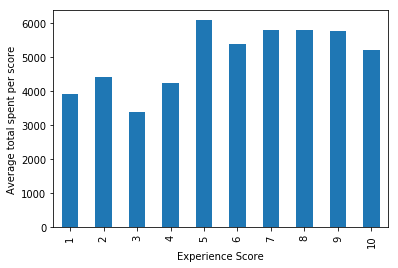

In [105]:
table['TOTAL SPENT'].plot(kind='bar')
plt.xlabel('Experience Score')
plt.ylabel('Average total spent per score')
plt.xticks([0,1,2,3,4,5,6,7,8,9],[1,2,3,4,5,6,7,8,9,10])
plt.show()